In [67]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pandas as pd

In [68]:
# example given in lab manual

In [69]:
# code below solves the system 2x1+x2=4 and x1+3x2=7 and prints the values of x1 and x2 as the solution.
A = np.array([[2,1],[1,3]])
B = np.array([4,7])

#solving for variable X using matrix inversion
X = np.linalg.inv(A).dot(B)
print("Solution:")
print(X)

Solution:
[1. 2.]


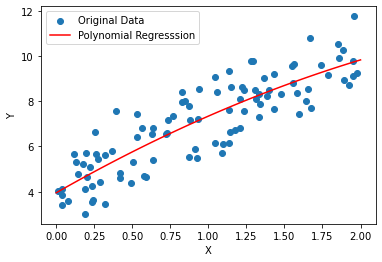

Coefficients:
[[ 0.          3.84100842 -0.45190593]]
Intercept:
[3.95139826]


In [70]:
# Generate sample data
np.random.seed(0)
X = 2*np.random.rand(100,1)
Y = 4 + 3 * X + np.random.randn(100,1)

# fit a polynomial reg model
degree = 2 #degree can be changed as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

# make predictions
X_new = np.linspace(0, 2, 100).reshape(-1,1)
X_new_poly = poly_features.transform(X_new)
Y_new = model.predict(X_new_poly)

#ploting the original data and polynomial reg curve
plt.scatter(X,Y,label='Original Data')
plt.plot(X_new, Y_new, 'r-', label='Polynomial Regresssion')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
#coefficients of multivariate poly reg model
coef = model.coef_
intercept = model.intercept_
print("Coefficients:")
print(coef)
print("Intercept:")
print(intercept)

Confusion Matrix:
[[19  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



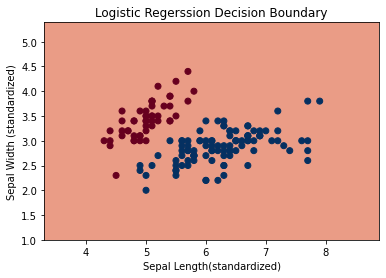

In [71]:
# loading iris dataset
iris = datasets.load_iris()
X = iris.data[:,:2]
y = (iris.target != 0) * 1 #converting the target labels to binary

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# creating log reg model
model = LogisticRegression(solver='liblinear')

# train the model
model.fit(X_train, y_train)

# make prediction on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# plotting decision boundry
x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Sepal Length(standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Logistic Regerssion Decision Boundary')
plt.show()

In [72]:
# Exercise Questions

In [73]:
# 1

In [74]:
def p(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_pred = np.linspace(X.min(), X.max(), 100)
    X_pred_poly = poly.transform(X_pred.reshape(-1, 1))

    y_pred = model.predict(X_pred_poly)
    print("Model Score: ",model.score(X_poly, y))

    plt.scatter(X, y, label='Actual Data')
    plt.plot(X_pred, y_pred, color='red', label=f'Polynomial Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

Model Score:  0.7489256418983963


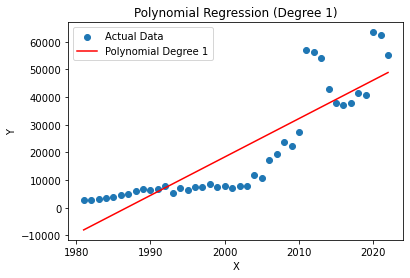

Model Score:  0.8507906059823671


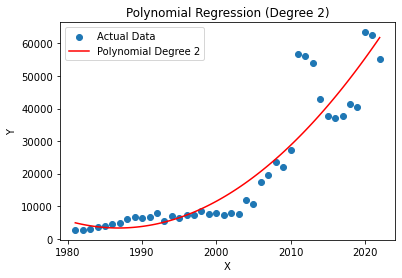

Model Score:  0.8525768369998017


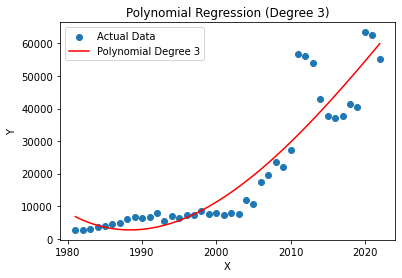

In [75]:
data = pd.read_csv("goldandsilver.csv")

X = data[['year']]
y = data['silverprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for degree in range(1,4):
    p(degree)


In [82]:
#2
import random

Confusion Matrix:
[[2 5]
 [3 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.38      0.50      0.43         6

    accuracy                           0.38        13
   macro avg       0.39      0.39      0.38        13
weighted avg       0.39      0.38      0.38        13

Model Score:  0.5238095238095238


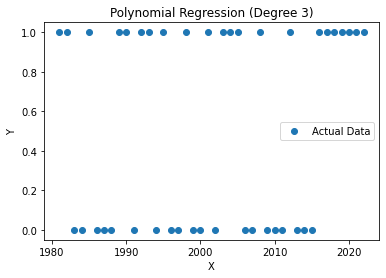

In [94]:
data = pd.read_csv("goldandsilver.csv")
#since we are taking random division, we'll always get different values for confusion matrix, score etc.
X = data[['year']]
y = data['silverprice']
for i in range(0, len(y)):
    y[i] = random.randint(0,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# creating log reg model
model = LogisticRegression(solver='liblinear')

# train the model
model.fit(X_train, y_train)

# make prediction on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Model Score: ",model.score(X, y))

# plotting decision boundry

X_pred = np.linspace(X.min(), X.max(), 100)

plt.scatter(X, y, label='Actual Data')
# plt.plot(X_pred, y_pred, color='red', label=f'Polynomial Degree {degree}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.show()

Mean Squared Error: 13807516.542219859
Model Score:  0.9835513776620298


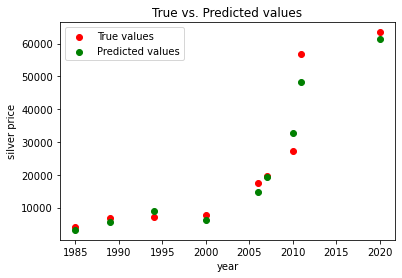

In [105]:
data = pd.read_csv("goldandsilver.csv")
X = data[['year', 'goldprice']]
y = data['silverprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
degree = 2 

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
X_poly = poly.fit_transform(X)
print("Model Score: ",model.score(X_poly, y))


plt.scatter(X_test["year"], y_test, color='red', label='True values')
plt.scatter(X_test["year"], y_pred, color='green', label='Predicted values')
plt.xlabel('year')
plt.ylabel('silver price')
plt.legend()
plt.title('True vs. Predicted values')
plt.show()

In [95]:
# 4

In [106]:
data = pd.read_csv("goldandsilver.csv")
#since we are taking random division, we'll always get different values for confusion matrix, score etc.
X = data[['year', 'goldprice']]
y = data['silverprice']
for i in range(0, len(y)):
    y[i] = random.randint(0,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# creating log reg model
model = LogisticRegression(solver='liblinear')

# train the model
model.fit(X_train, y_train)

# make prediction on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Model Score: ",model.score(X, y))

Confusion Matrix:
[[4 4]
 [0 5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.56      1.00      0.71         5

    accuracy                           0.69        13
   macro avg       0.78      0.75      0.69        13
weighted avg       0.83      0.69      0.68        13

Model Score:  0.5
